## Clustering Methods in Python
In this vignette, we will be comparing three different clusterig methods in python. We will be demonstrating this using a data set that deals with user behavior depending on what kind of phone they have.

### Objective:

## Data Description:
The dataset represents user behavior data collected from various mobile devices and includes 12 attributes for 188 users. Key attributes include Device Model, Operating System, and demographic information such as Age and Gender, alongside numerical metrics that measure daily device usage. These numerical metrics include App Usage Time (min/day), Screen On Time (hours/day), Battery Drain (mAh/day), Number of Apps Installed, and Data Usage (MB/day). Additionally, each user is assigned a User Behavior Class, which categorizes their usage patterns into five distinct classes.

The dataset provides a mix of categorical and numerical features, making it suitable for various clustering and classification analyses. The categorical features, such as Device Model and Operating System, allow for insights into behavioral differences across devices and platforms, while the numerical features provide detailed quantitative data on user interaction with their devices. With its diverse set of attributes, this dataset offers opportunities to explore user segmentation, predict user behavior patterns, and analyze correlations between usage habits and demographics.

## Clustering Methods:
Clsutering is a type of unsupervised machine learning that is used to group similar data points into unique clusters. Although the way in which similarity is determined varies between the different clustering methods, the end goal is still sorting data points in a way thhat maximizes similarity within a cluster while minimizing similarity between clusters.

Clustering can be used in many contexts as the unsupervised nature of the method means that it is very flexible. Some of the possible uses of clustering methods include fraud detection, crime analysis, and finance.

We will be comparing three different clustering methods today: k means, spectral, and agglomerative.

### K-Means Clustering:
TODO: INVESTIGATE CENTROID LOCATIONS IN PCA STEP
#### Summary of Method
K-Means clustering is a partitioning clustering algorithm that in principle is similar to the supervised machine learning method K-Nearest Neighbors. 

Following the classic k-means algorithm or "naive k-means", the method involves randomly selecting K points to serve as cluster centers or *centroids* and then assigning each point in the dataset to its nearest cluster using Euclidiean distance. The location of centroids are then recalculated to be the mean of all items within the cluster, and each point will be reassigned to its nearest cluster. The process of recalculating the centroid location and assigning clusters is repeated until cluster assignments stop changing(MORE DESCRIPT)

We chose to implement the ***k-means++ initialization*** and the ***elbow method*** to improve centroid locations and find the optimal number of clusters.
- **k-means++ initialization** involves selecting a random centroid, computing the distance between each point and the centroid, then selecting the location for the next centroid from datapoint with a probability proportional to the distance squared from the closest existing centroid. This is repeated k times and ensures that the centroids are less likely to be close together.
- **The elbow method** finds the optimal number of clusters by running k-means clustering for different values of k, then selecting for a number of clusters where the sum of squares distances between points(WCSS) does not drop significantly with the addition of more clusters.

????Although k-means clustering provides an intuitive framework for conducting cluster analysis, it has a few major drawbacks. First, as cluster centroids are randomly selected, different initializations can lead to different final cluster assignments and can converge to a local minimum instead of a global minimum. Also, as K-means requires the number of clusters to be specific beforehand, which is difficult to determind, results can significantly differ. The algorithm also assumes that clusters are spherical with similar sizes, which in turn means that it is also sensitive to outliers.?????
#### Limitations 
The naive k-means algorithm has faster alternatives and is not guaranteed to find the optimum clusters(FIND SOURCE)

#### Implementation

In [2]:
# Import relevant packages
from sklearn.cluster import KMeans # type: ignore
from sklearn.metrics import silhouette_score # type: ignore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt

# Read in data
df_transformed = pd.read_csv('../data/transformed_user_behavior_dataset.csv')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed)

#df_numeric = df_transformed[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)']]

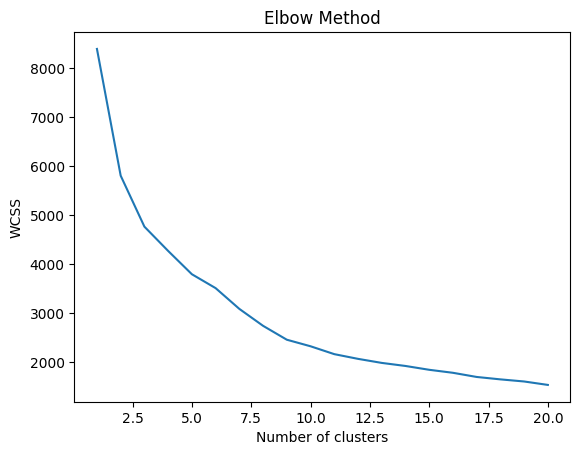

[0.2759070600272437, 0.2814501898465174, 0.2658692178931065, 0.25429087186923005, 0.2500366377380001, 0.2701538597913388, 0.3028711532078644, 0.3162290791680765, 0.30978076835061247, 0.3122197113332093, 0.2998591135817125, 0.2969794233130837, 0.2922831495684652, 0.29803503510100166, 0.29803131085041085, 0.2998136483985214, 0.2970346195092755, 0.2988580533300167, 0.3097403412924663]
8


In [9]:
# Use elbow method to find optimal number of clusters
wcss = [] # average within cluster sum of squares
silhouette_scores = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0) # n_init: Number of times the k-means algorithm is run with different centroid seeds
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertial is the wcss for a given number of clusters

    if i > 1:
        labels_i = kmeans.labels_
        silhouette_avg_i = silhouette_score(X_scaled, labels_i)
        silhouette_scores.append(silhouette_avg_i)
                             
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

print(silhouette_scores)
print(silhouette_scores.index(max(silhouette_scores)) + 1)

In [87]:
# Applying K-Means++ initialization
n_clusters = 8

print(f"Generating K-Means model with {n_clusters} clusters")
kmeans = KMeans(n_clusters=n_clusters, init='k-means++').fit(X_scaled)
labels = kmeans.labels_

Generating K-Means model with 8 clusters


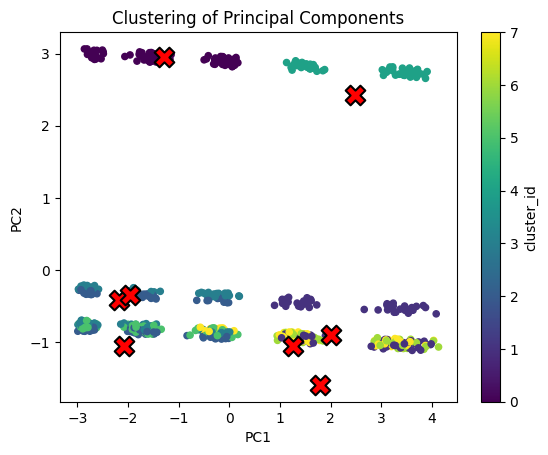

In [88]:
# Visualization using PCA 
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(X_scaled)

centroids = kmeans.cluster_centers_
centroids_2 = pca_2.fit_transform(centroids)

viz = pd.DataFrame(pca_2_result)
viz['cluster_id'] = labels
viz = viz.rename(columns={0: "PC1", 1:"PC2"})

viz.plot.scatter('PC1', 'PC2', c=2, colormap='viridis')

plt.scatter(centroids_2[:, 0], centroids_2[:, 1], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black")
plt.title('Clustering of Principal Components')
plt.savefig('k-means-clusters-PCA.png')
plt.show()

In [89]:
# Silhouette score... Necessary???
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette score for K-means model: {silhouette_avg}")

Silhouette score for K-means model: 0.2758851757888206



#### Spectral Clustering:
Spectral clustering is an advanced clustering technique that leverages the eigenvalues and eigenvectors of a similarity matrix to group data points based on their relationships, making it particularly effective for non-convex or complex datasets. Unlike traditional methods like k-means, spectral clustering identifies clusters by embedding the data in a lower-dimensional space, revealing hidden structures within the dataset.

In the context of our dataset, spectral clustering can be used to group users into behavior-based segments by considering both categorical features, such as Device Model and Operating System, and numerical features like App Usage Time and Screen On Time. By constructing a similarity matrix based on these features, spectral clustering can uncover intricate patterns in user behavior, identifying clusters that may not be immediately apparent with simpler methods. This approach is particularly useful given the mix of categorical and numerical data, as it allows for a holistic understanding of the relationships between user demographics and device usage habits.

#### Agglomerative Clustering:
Agglomerative clustering is a type of hierarchical clustering which aims to build a hierarchy of clusters in a "bottom-up" fashion. Each data point is initially labeled as its own separate clusters. Then the algorithm works recursively to merge and form larger clusters until either certain conditions as specified by the user is achieved or all clusters have merged into one. There are 3 main steps:
- Creating a proximity matrix
- Using a linkage function to group objects into a hierarchical cluster tree
- Merging clusters togther that are in close proximity

Unlike K-means clustering, agglomerative clustering does not require the number of clusters to be predetermined as the apporopriate number of clusters can be decided by analyzing the dendogram produced by the algorithm. Also, as agglomerative clustering can use different distance metrics, such as Euclidean or Manhattan, and linkage criterias, such as single, complete, or average, to define similarity between clusters, this method is significantly more flexible and powerful when compared to K-means clustering.

One of the main drawbacks of agglomerative clustering is that it can be very computationally expensive due to each observation starting as its own cluster. Furthermore, due to the "bottom-up" nature of the algorithm, once the decision to combine two clusters is made, it cannot undone. This can lead to suboptimal cluster solutions if early merges are not ideal.